In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mat73

import networkx as nx
import distanceclosure as dc

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warrior as war

WARRIOR
   brain initialized
   network initialized


In [3]:
file = 'data/FCs_visit1.mat'

In [4]:
data_dict = loadmat(file)
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FC2D', 'FC3D', 'FC_list_sorted'])

In [5]:
fcs = data_dict['FC3D']
fcs.shape

(116, 116, 147)

In [6]:
fcs = np.moveaxis(fcs, [2], [0])
fcs.shape

(147, 116, 116)

In [7]:
network_size = fcs.shape[1]
network_size

116

In [8]:
N_EDGES = int(((network_size*network_size-1)/2))
N_EDGES

6727

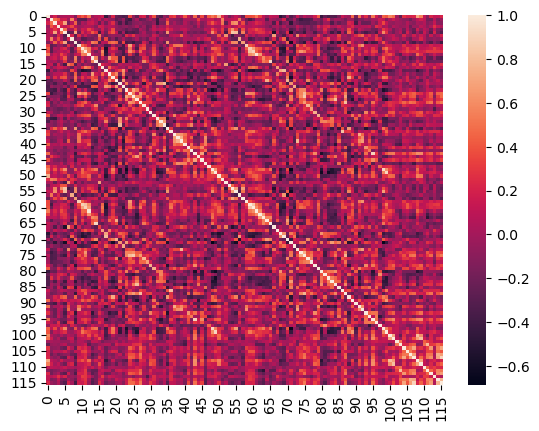

In [9]:
plt.figure()
sns.heatmap(fcs[0])
plt.show()

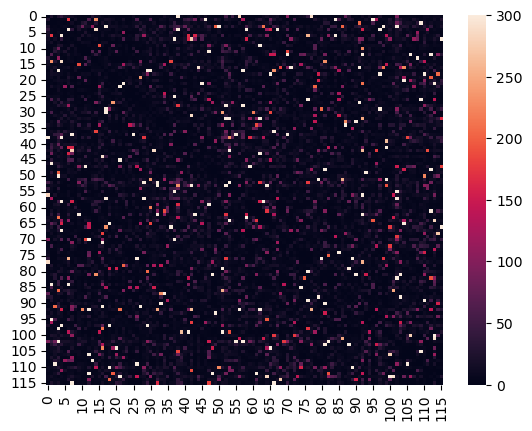

In [10]:
d_fcs = (1/np.abs(fcs))-1

plt.figure()
sns.heatmap(d_fcs[0], vmax=300)#, vmin=-0.04, vmax=0.04)
plt.show()

In [11]:
distances = war.brain.upper_vectorization(d_fcs[1])
edge_distance = {}

G = nx.complete_graph(network_size)
for e, d in zip(G.edges(), distances):
    edge_distance[e] = d
nx.set_edge_attributes(G, edge_distance, name='distance')

C = dc.distance_closure(G, kind='metric', weight='distance')
s_graph = dc.s_values(C)
s_values = np.array(list(nx.get_edge_attributes(s_graph, 's-value').values()))
smp = np.where(s_values>1,1,0).sum() / N_EDGES
smp_mass = np.where(s_values>1,s_values,0).sum()

In [12]:
smp_mass

9463.259685245217

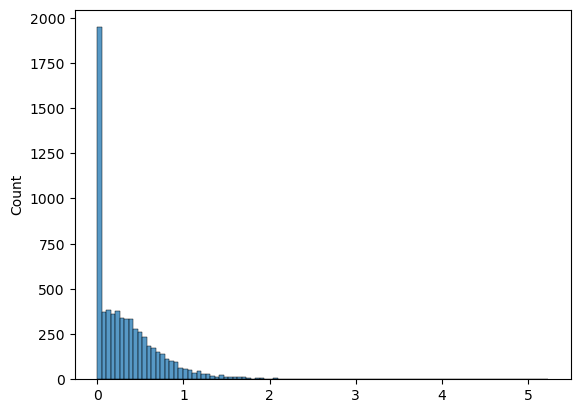

In [15]:
sns.histplot(np.log(s_values), bins=100)
plt.show()

In [127]:
distortion_array = []
smp_array = []
smp_mass_array = []
for idx, fc in enumerate(d_fcs):
    
    G = nx.complete_graph(network_size)
    distances = war.brain.upper_vectorization(fc)
    edge_distance = {}
    for e, d in zip(G.edges(), distances):
        edge_distance[e] = d
    nx.set_edge_attributes(G, edge_distance, name='distance')
    
    C = dc.distance_closure(G, kind='metric', weight='distance')
    s_graph = dc.s_values(C)
    s_values = np.array(list(nx.get_edge_attributes(s_graph, 's-value').values()))
    distortion_array.append(s_values)
    smp = np.where(s_values>1,1,0).sum() / N_EDGES
    smp_array.append(smp)
    smp_mass = np.where(s_values>1,s_values,0).sum()
    smp_mass_array.append(smp_mass)
    
    if idx % 10 == 0:
        print(f'Graph {idx} --> smp:{smp:.2f}%')

Graph 0 --> smp:0.86%
Graph 10 --> smp:0.88%
Graph 20 --> smp:0.86%
Graph 30 --> smp:0.74%
Graph 40 --> smp:0.85%
Graph 50 --> smp:0.86%
Graph 60 --> smp:0.81%
Graph 70 --> smp:0.83%
Graph 80 --> smp:0.73%
Graph 90 --> smp:0.87%
Graph 100 --> smp:0.86%
Graph 110 --> smp:0.70%
Graph 120 --> smp:0.86%
Graph 130 --> smp:0.82%
Graph 140 --> smp:0.86%


In [129]:
smp_values = np.array(smp_array)
smp_mass = np.array(smp_mass_array)

<AxesSubplot: ylabel='Count'>

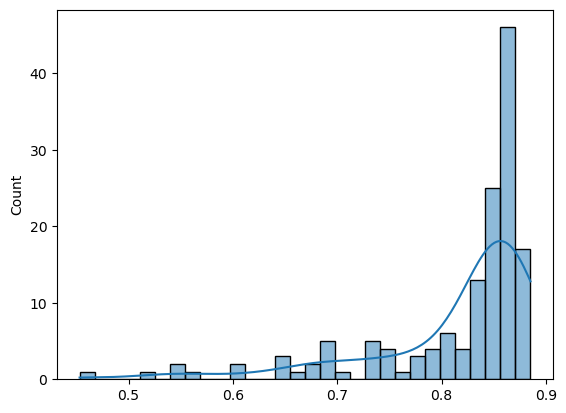

In [130]:
sns.histplot(smp_array, bins=30, kde=True)

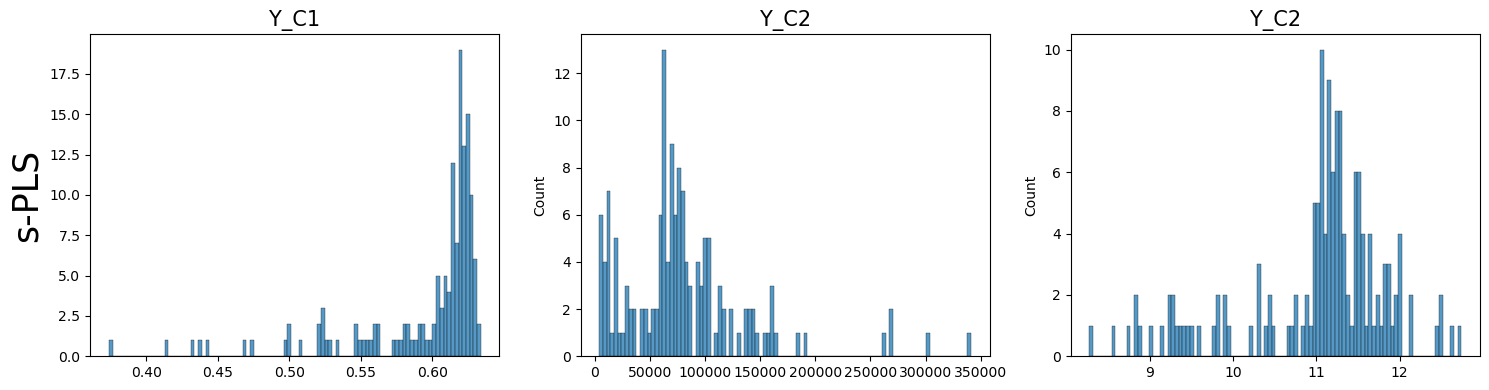

In [132]:
x_vars = 10

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes[0]
ax.set_title('Y_C1', fontsize=15)
sns.histplot(np.log(smp_values+1), bins=100, ax=ax)
#ax.set_xticklabels(phenotype_names, rotation = 60)
ax.set_ylabel('s-PLS', fontsize=25)

ax = axes[1]
ax.set_title('Y_C2', fontsize=15)
sns.histplot(smp_mass, bins=100, ax=ax)
#ax.set_xticklabels(phenotype_names, rotation = 60)

ax = axes[2]
ax.set_title('Y_C2', fontsize=15)
sns.histplot(np.log(smp_mass), bins=100, ax=ax)
#ax.set_xticklabels(phenotype_names, rotation = 60)


plt.tight_layout()
plt.show()

In [133]:
#smp_values = np.log(smp_array+1)
smp_values.shape

(147,)

In [138]:
#smp_mass_values = np.array(smp_mass_array)
smp_mass_log = np.log(smp_mass)
smp_mass_log.shape

(147,)

In [139]:
smp_mass.max(), smp_mass_log.max()

(341291.56420802395, 12.740492417941297)

In [147]:
# [HC, SMC, EMCI, MCI, LMCI, AD]
# [77,7,12,37,7,7]
np.cumsum([77,7,12,37,7,7])

array([ 77,  84,  96, 133, 140, 147])

In [163]:
smp_hc, smp_dm = smp_values[:77], smp_values[96:133]
smp_hc.shape, smp_dm.shape

((77,), (37,))

In [164]:
smpm_hc, smpm_dm = smp_mass_log[:77], smp_mass_log[96:133]
smpm_hc.shape, smpm_dm.shape

((77,), (37,))

In [165]:
77+63

140

In [166]:
smpm_hc.max(), smpm_dm.max()

(12.740492417941297, 12.502241049880608)

In [167]:
df1 = pd.DataFrame({'smp': smp_hc})
df1['status'] = 'hc'
df2 = pd.DataFrame({'smp': smp_dm})
df2['status'] = 'dm'
df_smp = pd.concat([df1,df2])
df_smp.head()

df1 = pd.DataFrame({'mass': smpm_hc})
df1['status'] = 'hc'
df2 = pd.DataFrame({'mass': smpm_dm})
df2['status'] = 'dm'
df_mass = pd.concat([df1,df2])
df_mass.head()

,mass,status
0,11.310588,hc
1,9.155172,hc
2,9.453657,hc
3,8.732445,hc
4,11.860577,hc


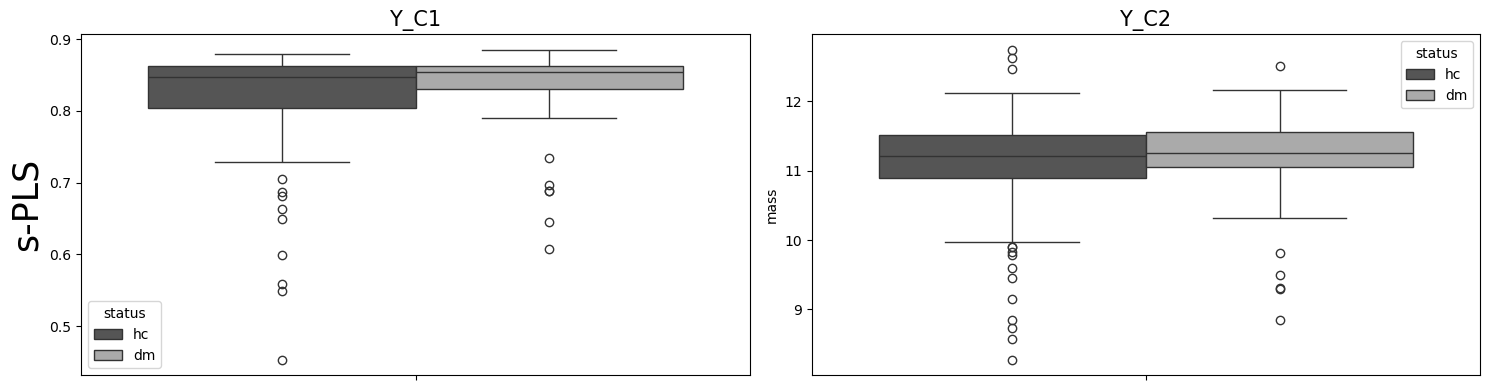

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax = axes[0]
ax.set_title('Y_C1', fontsize=15)
sns.boxplot(data=df_smp, y="smp", hue='status', palette='gray', ax=ax)
ax.set_ylabel('s-PLS', fontsize=25)

ax = axes[1]
ax.set_title('Y_C2', fontsize=15)
sns.boxplot(data=df_mass, y="mass", hue='status', palette='gray', ax=ax)

plt.tight_layout()
plt.show()